In [264]:
import os

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)
pd.set_option('display.float_format', '{:.2f}'.format)

In [147]:
df = pd.read_pickle('claims_df')

In [163]:
forest = RandomForestRegressor(n_estimators=1, random_state=314)

In [164]:
disease = ['SP_ALZHDMTA','SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN','SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']
gender = ['gender_2']
ESRD = ['ESRD_Y']

In [165]:
X = df[disease+gender+ESRD]
y = df.TOTAL_LOG_PAID

In [253]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=314)

In [254]:
X_train.shape

(2820, 13)

In [255]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
           oob_score=False, random_state=314, verbose=0, warm_start=False)

In [256]:
y_pred = pd.DataFrame(forest.predict(X_test), columns=['y_pred'])

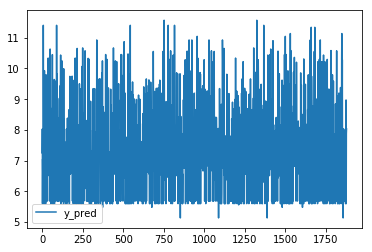

In [257]:
y_pred.plot();

In [258]:
first_tree = forest.estimators_[0]

In [259]:
feat_imp = pd.Series(forest.feature_importances_, index=X.columns)

In [260]:
feat_imp.sort_values(ascending=False)

SP_ISCHMCHT   0.33
SP_CHRNKIDN   0.14
SP_DIABETES   0.12
SP_DEPRESSN   0.07
SP_ALZHDMTA   0.06
SP_CHF        0.06
SP_RA_OA      0.05
gender_2      0.04
SP_OSTEOPRS   0.04
SP_CNCR       0.03
SP_STRKETIA   0.03
SP_COPD       0.02
ESRD_Y        0.02
dtype: float64

In [261]:
forest.predict(X_test)

array([7.25443132, 8.02943284, 5.6002005 , ..., 5.6002005 , 7.88246977,
       8.03281136])

In [262]:
forest.score(X_test, y_test)

0.3597939457853613